## Telecom customer churn data from Kaggle
url: https://www.kaggle.com/datasets/ivanhrek/telecom-churn?select=telecom_churn.csv

pip install seaborn

In [1]:
# import libraties

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# show all columns and rows

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# load data

data = pd.read_csv('telecom_churn_kaggle.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
data.shape

(3333, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
# explore data
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
data.describe(include = 'all')

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333,3333.000000,3333.000000,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,3333,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,382-4657,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,1,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [8]:
data.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [9]:
len(data)

3333

In [10]:
# check missing data (null/nan values)

data.isna().sum()/len(data)*100

state                     0.0
account length            0.0
area code                 0.0
phone number              0.0
international plan        0.0
voice mail plan           0.0
number vmail messages     0.0
total day minutes         0.0
total day calls           0.0
total day charge          0.0
total eve minutes         0.0
total eve calls           0.0
total eve charge          0.0
total night minutes       0.0
total night calls         0.0
total night charge        0.0
total intl minutes        0.0
total intl calls          0.0
total intl charge         0.0
customer service calls    0.0
churn                     0.0
dtype: float64

In [11]:
# or apply this calculation

data.isna().mean()*100

state                     0.0
account length            0.0
area code                 0.0
phone number              0.0
international plan        0.0
voice mail plan           0.0
number vmail messages     0.0
total day minutes         0.0
total day calls           0.0
total day charge          0.0
total eve minutes         0.0
total eve calls           0.0
total eve charge          0.0
total night minutes       0.0
total night calls         0.0
total night charge        0.0
total intl minutes        0.0
total intl calls          0.0
total intl charge         0.0
customer service calls    0.0
churn                     0.0
dtype: float64

In [12]:
IQR = data.describe(include = 'all').loc['75%'] - data.describe(include = 'all').loc['25%']
IQR

state                       NaN
account length             53.0
area code                 102.0
phone number                NaN
international plan          NaN
voice mail plan             NaN
number vmail messages      20.0
total day minutes          72.7
total day calls            27.0
total day charge          12.36
total eve minutes          68.7
total eve calls            27.0
total eve charge           5.84
total night minutes        68.3
total night calls          26.0
total night charge         3.07
total intl minutes          3.6
total intl calls            3.0
total intl charge          0.97
customer service calls      1.0
churn                       NaN
dtype: object

In [17]:
# fix column data types

dtype_dict = {
'state': 'category',
'area code': 'category',
'international plan': 'category',
'voice mail plan': 'category'
}

In [18]:
data = data.astype(dtype_dict)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   state                   3333 non-null   category
 1   account length          3333 non-null   int64   
 2   area code               3333 non-null   category
 3   phone number            3333 non-null   object  
 4   international plan      3333 non-null   category
 5   voice mail plan         3333 non-null   category
 6   number vmail messages   3333 non-null   int64   
 7   total day minutes       3333 non-null   float64 
 8   total day calls         3333 non-null   int64   
 9   total day charge        3333 non-null   float64 
 10  total eve minutes       3333 non-null   float64 
 11  total eve calls         3333 non-null   int64   
 12  total eve charge        3333 non-null   float64 
 13  total night minutes     3333 non-null   float64 
 14  total night calls       

In [20]:
# number of churn and non-churn customers

data[data['churn'] == True].shape[0]/data.shape[0]*100

14.491449144914492

In [21]:
data.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [22]:
data.churn.value_counts()/len(data)*100

False    85.508551
True     14.491449
Name: churn, dtype: float64

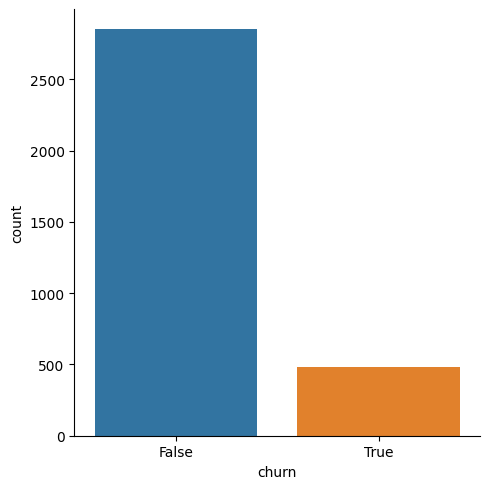

In [23]:
# visualize churn and non-churn data

sns.catplot(data = data, x = 'churn', kind = 'count')

In [24]:
x = data['churn'].tolist()

percentage = lambda i: len(i) / float(len(x)) * 100
percentage

<function __main__.<lambda>(i)>

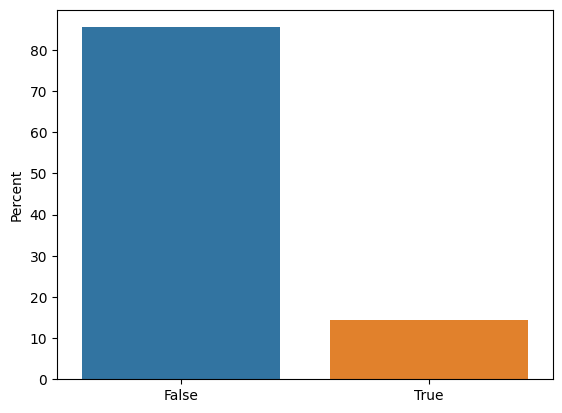

In [25]:
ax = sns.barplot(x = x, y = x, estimator = percentage)
ax.set(ylabel = 'Percent')
plt.show()

In [26]:
churn_val = data.churn.value_counts()
churn_val

False    2850
True      483
Name: churn, dtype: int64

In [27]:
x = list(churn_val.index)
x

[False, True]

In [28]:
y = list(churn_val)
y

[2850, 483]

array([0, 1])

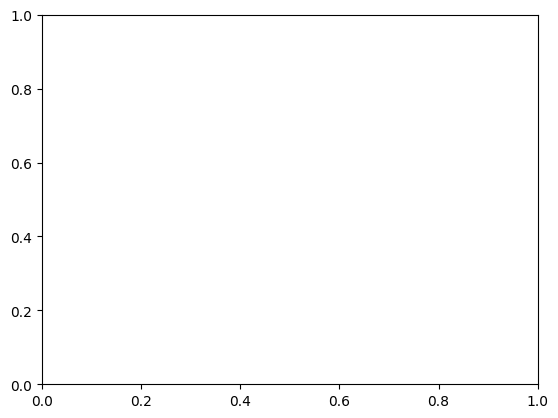

In [32]:
fig, ax = plt.subplots()

width = 0.75 # bar width
ind = np.arange(len(y)) # x locations for the group
ind


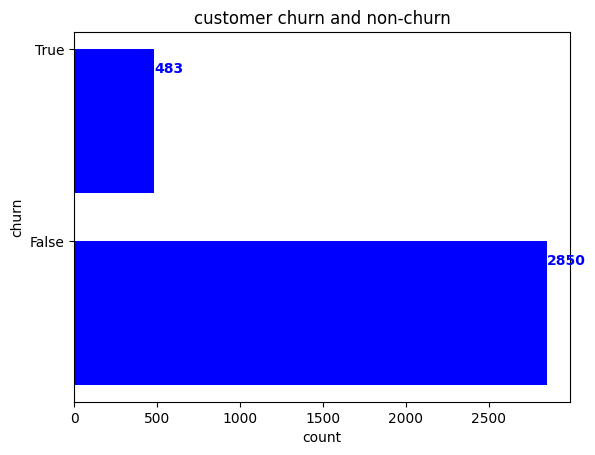

In [36]:
fig, ax = plt.subplots()

width = 0.75 # bar width
ind = np.arange(len(y)) # x locations for the group
ax.barh(ind, y, width, color = 'blue')
ax.set_yticks(ind + width / 2)
ax.set_yticklabels(x, minor = False)

for i, j in enumerate(y):

    ax.text(j + 0.25, i + 0.25, str(j), color = 'blue', fontweight = 'bold') # add value labels into bar

plt.title('customer churn and non-churn')
plt.xlabel('count')
plt.ylabel('churn')
plt.show()